<a href="https://colab.research.google.com/github/piu-23/emoji-aware-sarcasm-nlu/blob/main/Emoji-aware-sarcasmExecution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/piu-23/emoji-aware-sarcasm-nlu.git
%cd emoji-aware-sarcasm-nlu

Cloning into 'emoji-aware-sarcasm-nlu'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 264 (delta 47), reused 21 (delta 10), pack-reused 176 (from 3)
Receiving objects: 100% (264/264), 422.02 KiB | 2.28 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/emoji-aware-sarcasm-nlu


In [4]:
!pip -q install pandas scikit-learn emoji
!pip -q install torch transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 18.2 MB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!rm -rf /content/emoji-aware-sarcasm-nlu
!mkdir -p /content/emoji-aware-sarcasm-nlu
!unzip -q "/content/drive/MyDrive/Colab Notebooks/emoji-aware-sarcasm-nlu-main.zip" -d /content/emoji-aware-sarcasm-nlu
!ls -la /content/emoji-aware-sarcasm-nlu

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
total 16
drwxr-xr-x 4 root root 4096 Feb 15 18:47 .
drwxr-xr-x 1 root root 4096 Feb 15 18:47 ..
drwxrwxr-x 7 root root 4096 Feb 15 14:34 emoji-aware-sarcasm-nlu-main
drwxr-xr-x 3 root root 4096 Feb 15 18:47 __MACOSX


In [7]:
!find /content/emoji-aware-sarcasm-nlu -maxdepth 2 -type d

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
/content/emoji-aware-sarcasm-nlu
/content/emoji-aware-sarcasm-nlu/__MACOSX
/content/emoji-aware-sarcasm-nlu/__MACOSX/emoji-aware-sarcasm-nlu-main
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/data
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/src
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/results
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/configs
/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/contrib


In [8]:
%cd /content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
!ls

/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
configs  contrib  data	README.md  results  src


In [9]:
!pip -q install pandas scikit-learn
!pip -q install torch transformers accelerate
!pip -q install emoji

In [10]:
!ls -lh data

total 528K
-rw-rw-r-- 1 root root 2.0K Feb 11 09:18 prepare_splits.py
-rw-rw-r-- 1 root root  446 Feb 11 09:18 README_data.md
-rw-rw-r-- 1 root root  33K Feb 11 09:18 splits.json
-rw-rw-r-- 1 root root  610 Feb 11 09:18 stats.md
-rw-r--r-- 1 root root 480K Feb 15 14:31 train.En.csv


In [11]:
!python data/prepare_splits.py
!ls -lh data/splits.json

splits.json written successfully
-rw-rw-r-- 1 root root 33K Feb 15 18:48 data/splits.json


In [12]:
!find src -maxdepth 3 -type f -name "*tfidf*" -o -name "*baseline*" -o -name "*lr*.py"

src/baselines
src/baselines/train_tfidf_lr.py


In [13]:
%cd /content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
!mv src/experiements src/experiments
!touch src/__init__.py src/experiments/__init__.py
!ls -la src

/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
total 44
drwxrwxr-x 9 root root 4096 Feb 15 18:48 .
drwxrwxr-x 7 root root 4096 Feb 15 14:34 ..
drwxrwxr-x 2 root root 4096 Feb 11 09:18 baselines
drwxrwxr-x 2 root root 4096 Feb 15 14:34 data
-rw-r--r-- 1 root root 6148 Feb 15 14:34 .DS_Store
drwxrwxr-x 2 root root 4096 Feb 11 09:18 eval
drwxrwxr-x 2 root root 4096 Feb 15 18:48 experiments
-rw-r--r-- 1 root root    0 Feb 15 18:48 __init__.py
drwxrwxr-x 2 root root 4096 Feb 11 09:18 models
drwxrwxr-x 2 root root 4096 Feb 11 09:18 train
drwxrwxr-x 2 root root 4096 Feb 11 09:18 transformers


In [14]:
!python -m src.baselines.train_tfidf_lr --variant text --run_name lr_tfidf_text

[lr_tfidf_text] dev macro_f1=0.5672 acc=0.6967


In [15]:
!python -m src.baselines.train_tfidf_lr --variant demojized --run_name lr_tfidf_demojized

[lr_tfidf_demojized] dev macro_f1=0.5672 acc=0.6967


In [16]:
!ls -la results/lr_tfidf_text
!ls -la results/lr_tfidf_demojized

total 36
drwxr-xr-x 2 root root  4096 Feb 15 18:48 .
drwxrwxr-x 4 root root  4096 Feb 15 18:48 ..
-rw-r--r-- 1 root root   111 Feb 15 18:48 config.json
-rw-r--r-- 1 root root   117 Feb 15 18:48 confusion.json
-rw-r--r-- 1 root root   373 Feb 15 18:48 metrics.json
-rw-r--r-- 1 root root 14603 Feb 15 18:48 preds.csv
total 36
drwxr-xr-x 2 root root  4096 Feb 15 18:48 .
drwxrwxr-x 4 root root  4096 Feb 15 18:48 ..
-rw-r--r-- 1 root root   116 Feb 15 18:48 config.json
-rw-r--r-- 1 root root   117 Feb 15 18:48 confusion.json
-rw-r--r-- 1 root root   373 Feb 15 18:48 metrics.json
-rw-r--r-- 1 root root 14603 Feb 15 18:48 preds.csv


In [17]:
import json

for run in ["lr_tfidf_text", "lr_tfidf_demojized"]:
    with open(f"results/{run}/metrics.json") as f:
        m = json.load(f)
    print(run, "macro_f1=", round(m["macro_f1"], 4), "acc=", round(m["accuracy"], 4))

lr_tfidf_text macro_f1= 0.5672 acc= 0.6967
lr_tfidf_demojized macro_f1= 0.5672 acc= 0.6967


In [18]:
import pandas as pd
df = pd.read_csv("data/train.En.csv")
print(df.columns)

Index(['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony',
       'satire', 'understatement', 'overstatement', 'rhetorical_question'],
      dtype='object')


In [19]:
%%writefile src/data/make_variants.py
from __future__ import annotations

import argparse
from pathlib import Path

import pandas as pd
import emoji


def is_emoji(ch: str) -> bool:
    return ch in emoji.EMOJI_DATA


def extract_emoji_only(text: str) -> str:
    return "".join([ch for ch in text if is_emoji(ch)]).strip()


def remove_emojis(text: str) -> str:
    return "".join([ch for ch in text if not is_emoji(ch)]).strip()


def demojize(text: str) -> str:
    return emoji.demojize(text, delimiters=(" ", " ")).strip()


def main() -> None:
    ap = argparse.ArgumentParser()
    ap.add_argument("--in_csv", default="data/train.En.csv")
    ap.add_argument("--out_csv", default="data/train.En.processed.csv")
    args = ap.parse_args()

    df = pd.read_csv(args.in_csv)
    tweets = df["tweet"].astype(str)

    df["emoji_only"] = tweets.map(extract_emoji_only)
    df["text_only"] = tweets.map(remove_emojis)
    df["emoji_to_text"] = tweets.map(demojize)

    Path(args.out_csv).parent.mkdir(parents=True, exist_ok=True)
    df.to_csv(args.out_csv, index=False)


if __name__ == "__main__":
    main()

Writing src/data/make_variants.py


In [20]:
!pip -q install emoji
!python src/data/make_variants.py --in_csv data/train.En.csv --out_csv data/train.En.processed.csv
!ls -lh data/train.En.processed.csv

-rw-r--r-- 1 root root 1.3M Feb 15 18:48 data/train.En.processed.csv


In [21]:
import pandas as pd
df = pd.read_csv("data/train.En.processed.csv")
print(df.columns.tolist())
print(df[["tweet","text_only","emoji_to_text","emoji_only"]].head(3).to_string(index=False))

['Unnamed: 0', 'tweet', 'sarcastic', 'rephrase', 'sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question', 'emoji_only', 'text_only', 'emoji_to_text']
                                                                                                                                                                                                                                       tweet                                                                                                                                                                                                                                text_only                                                                                                                                                                                                                                                                                            emoji_to_text emoji_only
                                         

In [22]:
from pathlib import Path
p = Path("src/baselines/train_tfidf_lr.py")
s = p.read_text(encoding="utf-8").splitlines()
out = []
for line in s:
    out.append(line)
    if line.strip() == 'p.add_argument("--data_dir", default="data")':
        out.append('    p.add_argument("--train_file", default="train.En.csv")')
p.write_text("\n".join(out), encoding="utf-8")

2761

In [23]:
from pathlib import Path

p = Path("src/baselines/train_tfidf_lr.py")
txt = p.read_text(encoding="utf-8")

old = "splits = load_splits(data_dir=args.data_dir)"
new = "splits = load_splits(data_dir=args.data_dir, train_file=args.train_file)"

if old not in txt:
    raise ValueError("Target line not found. Open the file and check the exact text.")

p.write_text(txt.replace(old, new), encoding="utf-8")
print("Patched load_splits() call to include train_file.")

Patched load_splits() call to include train_file.


In [24]:
!sed -i 's/splits = load_splits(data_dir=args.data_dir)/splits = load_splits(data_dir=args.data_dir, train_file=args.train_file)/' src/baselines/train_tfidf_lr.py
!grep -n "load_splits" src/baselines/train_tfidf_lr.py | head

10:from src.experiments.common import get_variant_column, load_splits
29:    splits = load_splits(data_dir=args.data_dir, train_file=args.train_file)


In [25]:
from pathlib import Path

p = Path("src/baselines/train_tfidf_lr.py")
lines = p.read_text(encoding="utf-8").splitlines()

out = []
seen = 0
for line in lines:
    if 'add_argument("--train_file"' in line:
        seen += 1
        if seen >= 2:
            continue
    out.append(line)

p.write_text("\n".join(out) + "\n", encoding="utf-8")
print("Removed duplicate --train_file (kept the first one).")

Removed duplicate --train_file (kept the first one).


In [26]:
!grep -n "load_splits" src/baselines/train_tfidf_lr.py | head -n 5

10:from src.experiments.common import get_variant_column, load_splits
29:    splits = load_splits(data_dir=args.data_dir, train_file=args.train_file)


In [27]:
!python -m src.baselines.train_tfidf_lr --variant text --run_name lr_tfidf_text_proc --train_file train.En.processed.csv
!python -m src.baselines.train_tfidf_lr --variant demojized --run_name lr_tfidf_demojized_proc --train_file train.En.processed.csv

[lr_tfidf_text_proc] dev macro_f1=0.5672 acc=0.6967
[lr_tfidf_demojized_proc] dev macro_f1=0.5687 acc=0.6987


In [28]:
!find src/transformers -maxdepth 2 -type f -name "*.py" -print
!ls -la src/transformers

src/transformers/hf_dataset.py
src/transformers/train_transformer.py
total 20
drwxrwxr-x  2 root root 4096 Feb 11 09:18 .
drwxrwxr-x 10 root root 4096 Feb 15 18:48 ..
-rw-rw-r--  1 root root  850 Feb 11 09:18 hf_dataset.py
-rw-rw-r--  1 root root 5091 Feb 11 09:18 train_transformer.py


In [29]:
!ls -la configs

total 16
drwxrwxr-x 2 root root 4096 Feb 11 09:18 .
drwxrwxr-x 7 root root 4096 Feb 15 14:34 ..
-rw-rw-r-- 1 root root  112 Feb 11 09:18 gated_fusion.yaml
-rw-rw-r-- 1 root root    0 Feb 11 09:18 .gitkeep.txt
-rw-rw-r-- 1 root root  135 Feb 11 09:18 transformer_text_only.yaml


In [30]:
!find src/train -maxdepth 2 -type f -name "*.py" -print
!find src/transformers -maxdepth 2 -type f -name "*.py" -print

src/train/train_gated_fusion.py
src/train/train_transformer.py
src/train/__init__.py
src/transformers/hf_dataset.py
src/transformers/train_transformer.py


In [31]:
!grep -R "yaml" -n src/train src/transformers | head -n 40

In [32]:
!find . -name "transformer_text_only.yaml" -o -name "gated_fusion.yaml"

./configs/gated_fusion.yaml
./configs/transformer_text_only.yaml


In [33]:
!cat configs/transformer_text_only.yaml

model_type: transformer
input_variant: text_only
pretrained_name: roberta-base
max_len: 128
batch_size: 16
lr: 2e-5
epochs: 4
seed: 42


In [34]:
!grep -R "model_type" -n src | head -n 40

In [35]:
!find src -maxdepth 2 -type f -name "*.py"

src/data/preprocess.py
src/data/loader.py
src/data/__init__.py
src/data/make_variants.py
src/train/train_gated_fusion.py
src/train/train_transformer.py
src/train/__init__.py
src/experiments/metrics.py
src/experiments/common.py
src/experiments/io.py
src/experiments/__init__.py
src/baselines/train_tfidf_lr.py
src/eval/__init__.py
src/eval/eval_pairs.py
src/eval/evaluate.py
src/transformers/hf_dataset.py
src/transformers/train_transformer.py
src/__init__.py
src/models/gated_fusion.py
src/models/__init__.py


In [36]:
!python src/train/train_transformer.py -h

In [37]:
!sed -n '1,80p' src/train/train_transformer.py

In [38]:
!python src/train/train_transformer.py --config configs/transformer_text_only.yaml --train_file data/train.En.processed.csv

In [39]:
!python src/train/train_transformer.py -h

In [40]:
!tail -n 40 src/train/train_transformer.py

In [41]:
import json
from pathlib import Path

cfg = {
    "run_name": "roberta_text_only",
    "model_name": "roberta-base",
    "variant": "text",          # we’ll map this to text_only via columns (see below)
    "max_len": 128,
    "lr": 2e-5,
    "weight_decay": 0.01,
    "epochs": 4,
    "batch_size": 16,
    "warmup_ratio": 0.1,
    "seed": 42,
    "patience": 2
}

Path("configs").mkdir(exist_ok=True)
Path("configs/roberta_text_only.json").write_text(json.dumps(cfg, indent=2))
print("Wrote configs/roberta_text_only.json")

Wrote configs/roberta_text_only.json


In [42]:
from pathlib import Path

p = Path("src/experiments/common.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace('train_file: str = "train.En.csv"', 'train_file: str = "train.En.processed.csv"')
p.write_text(txt, encoding="utf-8")

print("Updated default train_file to train.En.processed.csv")

Updated default train_file to train.En.processed.csv


In [43]:
!grep -n "train_file" src/experiments/common.py | head

19:    train_file: str = "train.En.processed.csv",
24:    df = pd.read_csv(data_dir / train_file)


In [44]:
!python src/transformers/train_transformer.py --config configs/roberta_text_only.json

Traceback (most recent call last):
  File "/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main/src/transformers/train_transformer.py", line 14, in <module>
    from src.experiments.common import get_variant_column, load_splits
ModuleNotFoundError: No module named 'src'


In [45]:
%cd /content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
!python -m src.transformers.train_transformer --config configs/roberta_text_only.json

/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main
config.json: 100% 481/481 [00:00<00:00, 2.06MB/s]
tokenizer_config.json: 100% 25.0/25.0 [00:00<00:00, 161kB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 5.23MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 25.1MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 8.74MB/s]
model.safetensors: 100% 499M/499M [00:03<00:00, 162MB/s]
Loading weights: 100% 197/197 [00:00<00:00, 858.89it/s, Materializing param=roberta.encoder.layer.11.output.dense.weight]
RobertaForSequenceClassification LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.layer_norm.bias         | UNEXPECTED | 
lm_head.layer_norm.weight       | UNEXPECTED | 
lm_head.dense.weight            | UNEXPECTED | 
lm_head.bias                    | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
classifier.out_proj.bias        | MISSING

In [46]:
import json
from pathlib import Path

base = json.loads(Path("configs/roberta_text_only.json").read_text())

cfg_full = dict(base)
cfg_full["run_name"] = "roberta_full"
cfg_full["variant"] = "full"
Path("configs/roberta_full.json").write_text(json.dumps(cfg_full, indent=2))

cfg_dem = dict(base)
cfg_dem["run_name"] = "roberta_demojized"
cfg_dem["variant"] = "demojized"
Path("configs/roberta_demojized.json").write_text(json.dumps(cfg_dem, indent=2))

print("created:", "configs/roberta_full.json", "configs/roberta_demojized.json")

created: configs/roberta_full.json configs/roberta_demojized.json


In [47]:
!python -m src.transformers.train_transformer --config configs/roberta_full.json

Loading weights: 100% 197/197 [00:00<00:00, 1401.55it/s, Materializing param=roberta.encoder.layer.11.output.dense.weight]
RobertaForSequenceClassification LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.layer_norm.weight       | UNEXPECTED | 
lm_head.dense.weight            | UNEXPECTED | 
lm_head.layer_norm.bias         | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
lm_head.bias                    | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
classifier.dense.bias           | MISSING    | 
classifier.dense.weight         | MISSING    | 
classifier.out_proj.weight      | MISSING    | 
classifier.out_proj.bias        | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downst

In [48]:
!python -m src.transformers.train_transformer --config configs/roberta_demojized.json

Loading weights: 100% 197/197 [00:00<00:00, 1318.92it/s, Materializing param=roberta.encoder.layer.11.output.dense.weight]
RobertaForSequenceClassification LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.layer_norm.weight       | UNEXPECTED | 
lm_head.bias                    | UNEXPECTED | 
lm_head.dense.weight            | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
lm_head.layer_norm.bias         | UNEXPECTED | 
classifier.out_proj.weight      | MISSING    | 
classifier.out_proj.bias        | MISSING    | 
classifier.dense.weight         | MISSING    | 
classifier.dense.bias           | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downst

In [49]:
import json
import pandas as pd
import emoji

def has_emoji(s: str) -> bool:
    s = str(s)
    return any(ch in emoji.EMOJI_DATA for ch in s)

df = pd.read_csv("data/train.En.processed.csv")

with open("data/splits.json") as f:
    splits = json.load(f)

dev = df[df.index.isin(set(splits["dev_ids"]))].copy()
mask = dev["tweet"].apply(has_emoji)

print("Dev size:", len(dev))
print("Dev with emoji:", mask.sum())
print("Emoji fraction:", round(mask.mean(), 4))

Dev size: 521
Dev with emoji: 94
Emoji fraction: 0.1804


In [50]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

def eval_subset(run_name: str, subset_ids):
    preds = pd.read_csv(f"results/{run_name}/preds.csv")
    preds = preds[preds["id"].isin(subset_ids)]
    y_true = preds["y_true"].values
    y_pred = preds["y_pred"].values
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average="macro")

subset_ids = set(dev[mask].index.astype(int).tolist())

runs = ["roberta_text_only", "roberta_full", "roberta_demojized"]
for r in runs:
    acc, mf1 = eval_subset(r, subset_ids)
    print(f"{r:18s}  macro_f1={mf1:.4f}  acc={acc:.4f}")

roberta_text_only   macro_f1=0.6628  acc=0.7660
roberta_full        macro_f1=0.7122  acc=0.7872
roberta_demojized   macro_f1=0.6546  acc=0.7447


In [51]:
!ls -la configs/gated_fusion.yaml
!sed -n '1,200p' configs/gated_fusion.yaml
!ls -la src/train/train_gated_fusion.py

-rw-rw-r-- 1 root root 112 Feb 11 09:18 configs/gated_fusion.yaml
model_type: gated_fusion
pretrained_name: roberta-base
max_len: 128
batch_size: 16
lr: 2e-5
epochs: 4
seed: 42

-rw-rw-r-- 1 root root 0 Feb 11 09:18 src/train/train_gated_fusion.py


In [52]:
!pip -q install pyyaml

In [53]:
!sed -n '1,200p' src/models/gated_fusion.py

In [54]:
%%writefile src/transformers/gated_fusion.py
from __future__ import annotations

import torch
import torch.nn as nn
from transformers import AutoModel


class GatedFusionClassifier(nn.Module):
    def __init__(self, pretrained_name: str, dropout: float = 0.1):
        super().__init__()
        self.enc_a = AutoModel.from_pretrained(pretrained_name)
        self.enc_b = AutoModel.from_pretrained(pretrained_name)

        hidden = self.enc_a.config.hidden_size
        self.gate = nn.Linear(hidden * 2, hidden)
        self.drop = nn.Dropout(dropout)
        self.cls = nn.Linear(hidden, 2)

    def forward(
        self,
        a_input_ids: torch.Tensor,
        a_attention_mask: torch.Tensor,
        b_input_ids: torch.Tensor,
        b_attention_mask: torch.Tensor,
    ) -> torch.Tensor:
        ha = self.enc_a(input_ids=a_input_ids, attention_mask=a_attention_mask).last_hidden_state[:, 0]
        hb = self.enc_b(input_ids=b_input_ids, attention_mask=b_attention_mask).last_hidden_state[:, 0]

        g = torch.sigmoid(self.gate(torch.cat([ha, hb], dim=-1)))
        h = g * ha + (1.0 - g) * hb

        h = self.drop(h)
        return self.cls(h)

Writing src/transformers/gated_fusion.py


In [55]:
%%writefile src/train/train_gated_fusion.py
from __future__ import annotations

import argparse
from dataclasses import asdict, dataclass
from pathlib import Path
from typing import List, Tuple

import numpy as np
import torch
import yaml
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, get_linear_schedule_with_warmup

from src.experiments.common import load_splits
from src.experiments.io import ensure_dir, save_json, save_preds_csv
from src.experiments.metrics import compute_metrics
from src.transformers.gated_fusion import GatedFusionClassifier


def set_seed(seed: int) -> None:
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


@dataclass
class Cfg:
    model_type: str
    pretrained_name: str
    max_len: int
    batch_size: int
    lr: float
    epochs: int
    seed: int
    run_name: str = "gated_fusion"
    weight_decay: float = 0.01
    warmup_ratio: float = 0.1
    patience: int = 2


def parse_args() -> argparse.Namespace:
    p = argparse.ArgumentParser()
    p.add_argument("--config", required=True)
    return p.parse_args()


def load_cfg(path: str | Path) -> Cfg:
    with Path(path).open("r", encoding="utf-8") as f:
        raw = yaml.safe_load(f)
    return Cfg(**raw)


class DualDataset(torch.utils.data.Dataset):
    def __init__(self, enc_a, enc_b, labels: List[int], ids: List[int]):
        self.enc_a = enc_a
        self.enc_b = enc_b
        self.labels = labels
        self.ids = ids

    def __len__(self) -> int:
        return len(self.labels)

    def __getitem__(self, idx: int):
        return {
            "a_input_ids": torch.tensor(self.enc_a["input_ids"][idx]),
            "a_attention_mask": torch.tensor(self.enc_a["attention_mask"][idx]),
            "b_input_ids": torch.tensor(self.enc_b["input_ids"][idx]),
            "b_attention_mask": torch.tensor(self.enc_b["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
            "id": torch.tensor(self.ids[idx], dtype=torch.long),
        }


@torch.no_grad()
def predict(model, loader, device) -> Tuple[np.ndarray, np.ndarray, np.ndarray, List[int]]:
    model.eval()
    ys, yp, pr, ids = [], [], [], []
    for batch in loader:
        batch_ids = batch.pop("id").cpu().numpy().tolist()
        y = batch.pop("labels").cpu().numpy()

        batch = {k: v.to(device) for k, v in batch.items()}
        logits = model(**batch).detach().cpu().numpy()

        probs = torch.softmax(torch.tensor(logits), dim=-1).numpy()[:, 1]
        pred = (probs >= 0.5).astype(int)

        ys.append(y)
        yp.append(pred)
        pr.append(probs)
        ids.extend(batch_ids)

    return np.concatenate(ys), np.concatenate(yp), np.concatenate(pr), ids


def main() -> None:
    args = parse_args()
    cfg = load_cfg(args.config)

    set_seed(cfg.seed)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    splits = load_splits()  # should default to train.En.processed.csv from your earlier patch

    df_tr = splits.train
    df_dv = splits.dev

    x_text_tr = df_tr["text_only"].astype(str).tolist()
    x_emoji_tr = df_tr["emoji_only"].astype(str).tolist()
    y_tr = df_tr["sarcastic"].astype(int).tolist()
    ids_tr = df_tr.index.astype(int).tolist()

    x_text_dv = df_dv["text_only"].astype(str).tolist()
    x_emoji_dv = df_dv["emoji_only"].astype(str).tolist()
    y_dv = df_dv["sarcastic"].astype(int).tolist()
    ids_dv = df_dv.index.astype(int).tolist()

    tok = AutoTokenizer.from_pretrained(cfg.pretrained_name, use_fast=True)

    enc_text_tr = tok(x_text_tr, truncation=True, padding=True, max_length=cfg.max_len)
    enc_emoji_tr = tok(x_emoji_tr, truncation=True, padding=True, max_length=cfg.max_len)
    enc_text_dv = tok(x_text_dv, truncation=True, padding=True, max_length=cfg.max_len)
    enc_emoji_dv = tok(x_emoji_dv, truncation=True, padding=True, max_length=cfg.max_len)

    ds_tr = DualDataset(enc_text_tr, enc_emoji_tr, y_tr, ids_tr)
    ds_dv = DualDataset(enc_text_dv, enc_emoji_dv, y_dv, ids_dv)

    dl_tr = DataLoader(ds_tr, batch_size=cfg.batch_size, shuffle=True)
    dl_dv = DataLoader(ds_dv, batch_size=cfg.batch_size, shuffle=False)

    model = GatedFusionClassifier(cfg.pretrained_name)
    model.to(device)

    optim = torch.optim.AdamW(model.parameters(), lr=cfg.lr, weight_decay=cfg.weight_decay)

    total_steps = len(dl_tr) * cfg.epochs
    warmup_steps = int(total_steps * cfg.warmup_ratio)
    sched = get_linear_schedule_with_warmup(optim, warmup_steps, total_steps)

    best_f1 = -1.0
    best_state = None
    bad = 0

    for epoch in range(cfg.epochs):
        model.train()
        for batch in dl_tr:
            batch.pop("id")
            labels = batch.pop("labels").to(device)
            batch = {k: v.to(device) for k, v in batch.items()}

            logits = model(**batch)
            loss = torch.nn.functional.cross_entropy(logits, labels)

            optim.zero_grad(set_to_none=True)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optim.step()
            sched.step()

        y_true, y_pred, probs, ids = predict(model, dl_dv, device)
        m = compute_metrics(y_true, y_pred)
        print(f"epoch={epoch+1} dev macro_f1={m.macro_f1:.4f} acc={m.accuracy:.4f}")

        if m.macro_f1 > best_f1 + 1e-6:
            best_f1 = m.macro_f1
            best_state = {k: v.detach().cpu() for k, v in model.state_dict().items()}
            bad = 0
        else:
            bad += 1
            if bad >= cfg.patience:
                break

    if best_state is not None:
        model.load_state_dict(best_state)

    y_true, y_pred, probs, ids = predict(model, dl_dv, device)
    m = compute_metrics(y_true, y_pred)

    out_dir = ensure_dir(Path("results") / cfg.run_name)
    save_json(out_dir / "metrics.json", {"accuracy": m.accuracy, "macro_f1": m.macro_f1, "per_class": m.per_class})
    save_json(out_dir / "confusion.json", {"labels": [0, 1], "matrix": m.confusion})
    save_preds_csv(out_dir / "preds.csv", ids, y_true.tolist(), y_pred.tolist(), probs.tolist())
    save_json(out_dir / "config.json", asdict(cfg))

    print(f"[{cfg.run_name}] best dev macro_f1={m.macro_f1:.4f}")


if __name__ == "__main__":
    main()

Overwriting src/train/train_gated_fusion.py


In [56]:
from pathlib import Path
import re

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

pattern = r"def load_cfg\(path: str \| Path\) -> Cfg:\n(.*?)\n\n"
if "raw = yaml.safe_load" not in txt:
    print("Couldn't find load_cfg block, open the file to patch manually.")
else:
    new_block = """def load_cfg(path: str | Path) -> Cfg:
    with Path(path).open("r", encoding="utf-8") as f:
        raw = yaml.safe_load(f)

    # YAML sometimes parses scientific notation as strings in Colab.
    for k in ("max_len", "batch_size", "epochs", "seed", "patience"):
        if k in raw:
            raw[k] = int(raw[k])
    for k in ("lr", "weight_decay", "warmup_ratio"):
        if k in raw:
            raw[k] = float(raw[k])

    return Cfg(**raw)
"""
    import textwrap
    lines = txt.splitlines()
    out = []
    i = 0
    while i < len(lines):
        line = lines[i]
        if line.startswith("def load_cfg("):
            out.append(new_block.rstrip("\n"))
            i += 1
            while i < len(lines) and not lines[i].startswith("def "):
                i += 1
            continue
        out.append(line)
        i += 1

    p.write_text("\n".join(out) + "\n", encoding="utf-8")
    print("Patched load_cfg() to cast YAML numeric fields.")

Patched load_cfg() to cast YAML numeric fields.


In [57]:
!grep -n "def load_cfg" -n -A 25 src/train/train_gated_fusion.py | head -n 35

47:def load_cfg(path: str | Path) -> Cfg:
48-    with Path(path).open("r", encoding="utf-8") as f:
49-        raw = yaml.safe_load(f)
50-
51-    # YAML sometimes parses scientific notation as strings in Colab.
52-    for k in ("max_len", "batch_size", "epochs", "seed", "patience"):
53-        if k in raw:
54-            raw[k] = int(raw[k])
55-    for k in ("lr", "weight_decay", "warmup_ratio"):
56-        if k in raw:
57-            raw[k] = float(raw[k])
58-
59-    return Cfg(**raw)
60-def predict(model, loader, device) -> Tuple[np.ndarray, np.ndarray, np.ndarray, List[int]]:
61-    model.eval()
62-    ys, yp, pr, ids = [], [], [], []
63-    for batch in loader:
64-        batch_ids = batch.pop("id").cpu().numpy().tolist()
65-        y = batch.pop("labels").cpu().numpy()
66-
67-        batch = {k: v.to(device) for k, v in batch.items()}
68-        logits = model(**batch).detach().cpu().numpy()
69-
70-        probs = torch.softmax(torch.tensor(logits), dim=-1).numpy()[:, 1]
71-       

In [58]:
!grep -n "class Dual" -n src/train/train_gated_fusion.py
!grep -n "DualDataset" -n src/train/train_gated_fusion.py | head

110:    ds_tr = DualDataset(enc_text_tr, enc_emoji_tr, y_tr, ids_tr)
111:    ds_dv = DualDataset(enc_text_dv, enc_emoji_dv, y_dv, ids_dv)


In [59]:
from pathlib import Path

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

marker = "return Cfg(**raw)\n"
if marker not in txt:
    raise ValueError("Could not find insertion point after load_cfg().")

dataset_code = marker + """
class DualDataset(torch.utils.data.Dataset):
    def __init__(self, enc_a, enc_b, labels, ids):
        self.enc_a = enc_a
        self.enc_b = enc_b
        self.labels = labels
        self.ids = ids

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {
            "a_input_ids": torch.tensor(self.enc_a["input_ids"][idx]),
            "a_attention_mask": torch.tensor(self.enc_a["attention_mask"][idx]),
            "b_input_ids": torch.tensor(self.enc_b["input_ids"][idx]),
            "b_attention_mask": torch.tensor(self.enc_b["attention_mask"][idx]),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long),
            "id": torch.tensor(self.ids[idx], dtype=torch.long),
        }
"""

# avoid inserting twice
if "class DualDataset" not in txt:
    txt = txt.replace(marker, dataset_code)
    p.write_text(txt, encoding="utf-8")
    print("Inserted DualDataset class.")
else:
    print("DualDataset already exists somewhere in file.")

Inserted DualDataset class.


In [60]:
!grep -n "class DualDataset" -n src/train/train_gated_fusion.py
!grep -n "def main" -n src/train/train_gated_fusion.py

61:class DualDataset(torch.utils.data.Dataset):
101:def main() -> None:


In [61]:
!python -m src.train.train_gated_fusion --config configs/gated_fusion.yaml

Loading weights: 100% 197/197 [00:00<00:00, 1107.92it/s, Materializing param=encoder.layer.11.output.dense.weight]
RobertaModel LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.dense.weight            | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
lm_head.layer_norm.bias         | UNEXPECTED | 
lm_head.layer_norm.weight       | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
lm_head.bias                    | UNEXPECTED | 
pooler.dense.weight             | MISSING    | 
pooler.dense.bias               | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.
Loading weights: 100% 197/197 [00:00<00:00, 813.02it/s, Materializing param=encoder.layer.11.output.dense.weight]

In [62]:
!ls -la results/gated_fusion

total 36
drwxr-xr-x  2 root root  4096 Feb 15 19:10 .
drwxrwxr-x 10 root root  4096 Feb 15 19:10 ..
-rw-r--r--  1 root root   247 Feb 15 19:10 config.json
-rw-r--r--  1 root root   118 Feb 15 19:10 confusion.json
-rw-r--r--  1 root root   387 Feb 15 19:10 metrics.json
-rw-r--r--  1 root root 15132 Feb 15 19:10 preds.csv


In [63]:
import json, os

runs = [
    "lr_tfidf_text_proc",
    "lr_tfidf_demojized_proc",
    "roberta_text_only",
    "roberta_full",
    "roberta_demojized",
    "gated_fusion",
]

for r in runs:
    p = f"results/{r}/metrics.json"
    if not os.path.exists(p):
        print(r, "-> missing")
        continue
    m = json.load(open(p))
    print(f"{r:20s} macro_f1={m['macro_f1']:.4f}  acc={m['accuracy']:.4f}")

lr_tfidf_text_proc   macro_f1=0.5672  acc=0.6967
lr_tfidf_demojized_proc macro_f1=0.5687  acc=0.6987
roberta_text_only    macro_f1=0.6007  acc=0.7466
roberta_full         macro_f1=0.6025  acc=0.7562
roberta_demojized    macro_f1=0.5775  acc=0.7409
gated_fusion         macro_f1=0.5872  acc=0.7620


In [64]:
%%writefile src/transformers/gated_fusion.py
from __future__ import annotations

import torch
import torch.nn as nn
from transformers import AutoModel


class GatedFusionClassifier(nn.Module):
    def __init__(self, pretrained_name: str, dropout: float = 0.1):
        super().__init__()
        self.enc = AutoModel.from_pretrained(pretrained_name)

        hidden = self.enc.config.hidden_size
        self.gate = nn.Linear(hidden * 2, hidden)
        self.drop = nn.Dropout(dropout)
        self.cls = nn.Linear(hidden, 2)

    def forward(
        self,
        a_input_ids: torch.Tensor,
        a_attention_mask: torch.Tensor,
        b_input_ids: torch.Tensor,
        b_attention_mask: torch.Tensor,
        emoji_present: torch.Tensor | None = None,
    ) -> torch.Tensor:
        ha = self.enc(input_ids=a_input_ids, attention_mask=a_attention_mask).last_hidden_state[:, 0]
        hb = self.enc(input_ids=b_input_ids, attention_mask=b_attention_mask).last_hidden_state[:, 0]

        if emoji_present is None:
            emoji_present = torch.ones((ha.size(0),), device=ha.device, dtype=ha.dtype)
        else:
            emoji_present = emoji_present.to(device=ha.device, dtype=ha.dtype)

        g = torch.sigmoid(self.gate(torch.cat([ha, hb], dim=-1)))
        emoji_present = emoji_present.view(-1, 1)
        g = emoji_present * g + (1.0 - emoji_present) * 1.0

        h = g * ha + (1.0 - g) * hb
        h = self.drop(h)
        return self.cls(h)

Overwriting src/transformers/gated_fusion.py


In [65]:
from pathlib import Path
import re

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

# Insert emoji_present lists right after x_emoji_* are created
txt = txt.replace(
    'x_emoji_tr = df_tr["emoji_only"].astype(str).tolist()',
    'x_emoji_tr = df_tr["emoji_only"].astype(str).tolist()\n    emoji_present_tr = [1 if s.strip() else 0 for s in x_emoji_tr]'
)

txt = txt.replace(
    'x_emoji_dv = df_dv["emoji_only"].astype(str).tolist()',
    'x_emoji_dv = df_dv["emoji_only"].astype(str).tolist()\n    emoji_present_dv = [1 if s.strip() else 0 for s in x_emoji_dv]'
)

p.write_text(txt, encoding="utf-8")
print("Added emoji_present_tr/dev lists.")

Added emoji_present_tr/dev lists.


In [66]:
from pathlib import Path

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace(
    "def __init__(self, enc_a, enc_b, labels, ids):",
    "def __init__(self, enc_a, enc_b, labels, ids, emoji_present):"
)
txt = txt.replace(
    "self.ids = ids",
    "self.ids = ids\n        self.emoji_present = emoji_present"
)

# add field in __getitem__
needle = '"id": torch.tensor(self.ids[idx], dtype=torch.long),'
if needle in txt and '"emoji_present"' not in txt:
    txt = txt.replace(
        needle,
        needle + '\n            "emoji_present": torch.tensor(self.emoji_present[idx], dtype=torch.float),'
    )

p.write_text(txt, encoding="utf-8")
print("Updated DualDataset to include emoji_present.")

Updated DualDataset to include emoji_present.


In [67]:
from pathlib import Path

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

txt = txt.replace(
    "ds_tr = DualDataset(enc_text_tr, enc_emoji_tr, y_tr, ids_tr)",
    "ds_tr = DualDataset(enc_text_tr, enc_emoji_tr, y_tr, ids_tr, emoji_present_tr)"
)
txt = txt.replace(
    "ds_dv = DualDataset(enc_text_dv, enc_emoji_dv, y_dv, ids_dv)",
    "ds_dv = DualDataset(enc_text_dv, enc_emoji_dv, y_dv, ids_dv, emoji_present_dv)"
)

p.write_text(txt, encoding="utf-8")
print("Passed emoji_present into DualDataset.")

Passed emoji_present into DualDataset.


In [68]:
from pathlib import Path

p = Path("src/train/train_gated_fusion.py")
txt = p.read_text(encoding="utf-8")

# In predict(), don't pop emoji_present; keep it in batch and send to model
# In training loop, batch already becomes dict -> model(**batch) will receive emoji_present

# But we must ensure labels/id are removed properly and emoji_present stays.
# If your training loop pops labels then does batch = {k: v.to(device)}, it's fine.

p.write_text(txt, encoding="utf-8")
print("No extra change needed if model(**batch) is used with emoji_present in batch.")

No extra change needed if model(**batch) is used with emoji_present in batch.


In [71]:
!grep -n "emoji_present" -n src/train/train_gated_fusion.py | head -n 40

62:    def __init__(self, enc_a, enc_b, labels, ids, emoji_present):
67:        self.emoji_present = emoji_present
80:            "emoji_present": torch.tensor(self.emoji_present[idx], dtype=torch.float),
117:    emoji_present_tr = [1 if s.strip() else 0 for s in x_emoji_tr]
123:    emoji_present_dv = [1 if s.strip() else 0 for s in x_emoji_dv]
134:    ds_tr = DualDataset(enc_text_tr, enc_emoji_tr, y_tr, ids_tr, emoji_present_tr)
135:    ds_dv = DualDataset(enc_text_dv, enc_emoji_dv, y_dv, ids_dv, emoji_present_dv)


In [76]:
run_name = "gated_fusion_shared_masked"

In [77]:
%%writefile configs/gated_fusion.yaml
model_type: gated_fusion
run_name: gated_fusion_shared_masked
pretrained_name: roberta-base
max_len: 128
batch_size: 16
lr: 2e-5
epochs: 4
sid: 42

Overwriting configs/gated_fusion.yaml


In [78]:
%%writefile configs/gated_fusion.yaml
model_type: gated_fusion
run_name: gated_fusion_shared_masked
pretrained_name: roberta-base
max_len: 128
batch_size: 16
lr: 2e-5
epochs: 4
seed: 42

Overwriting configs/gated_fusion.yaml


In [79]:
!python -m src.train.train_gated_fusion --config configs/gated_fusion.yaml

Loading weights: 100% 197/197 [00:00<00:00, 1485.49it/s, Materializing param=encoder.layer.11.output.dense.weight]
RobertaModel LOAD REPORT from: roberta-base
Key                             | Status     | 
--------------------------------+------------+-
lm_head.bias                    | UNEXPECTED | 
lm_head.layer_norm.weight       | UNEXPECTED | 
lm_head.dense.weight            | UNEXPECTED | 
roberta.embeddings.position_ids | UNEXPECTED | 
lm_head.dense.bias              | UNEXPECTED | 
lm_head.layer_norm.bias         | UNEXPECTED | 
pooler.dense.weight             | MISSING    | 
pooler.dense.bias               | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.
epoch=1 dev macro_f1=0.4287 acc=0.7505
epoch=2 dev macro_f1=0.4527 acc=0.7562
epoch=3 dev macro_f1=0.5687 acc=0.7

In [80]:
import json
import pandas as pd
import emoji
from sklearn.metrics import f1_score, accuracy_score

def has_emoji(s: str) -> bool:
    s = str(s)
    return any(ch in emoji.EMOJI_DATA for ch in s)

df = pd.read_csv("data/train.En.processed.csv")
with open("data/splits.json") as f:
    splits = json.load(f)

dev = df[df.index.isin(set(splits["dev_ids"]))].copy()
subset_ids = set(dev[dev["tweet"].apply(has_emoji)].index.astype(int).tolist())

def eval_subset(run_name: str):
    preds = pd.read_csv(f"results/{run_name}/preds.csv")
    preds = preds[preds["id"].isin(subset_ids)]
    y_true = preds["y_true"].values
    y_pred = preds["y_pred"].values
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average="macro")

for r in ["roberta_full", "gated_fusion", "gated_fusion_shared_masked"]:
    acc, mf1 = eval_subset(r)
    print(f"{r:28s} macro_f1={mf1:.4f} acc={acc:.4f}")

roberta_full                 macro_f1=0.7122 acc=0.7872
gated_fusion                 macro_f1=0.6130 acc=0.7553
gated_fusion_shared_masked   macro_f1=0.6189 acc=0.7447


In [81]:
import os
print(os.getcwd())

/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main


In [82]:
!cp -r /content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main \
/content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup

In [83]:
!ls /content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup/results

gated_fusion		    lr_tfidf_text	roberta_full
gated_fusion_shared_masked  lr_tfidf_text_proc	roberta_text_only
lr_tfidf_demojized	    README_results.md
lr_tfidf_demojized_proc     roberta_demojized


In [84]:
import os
print(os.getcwd())

/content/emoji-aware-sarcasm-nlu/emoji-aware-sarcasm-nlu-main


In [85]:
%cd /content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup

/content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
!ls /content/drive/MyDrive

 1712818096534.jpg
'31996-23 aswathyramesh80@gmail.com_sig.pdf'
 aswathyresume.docx
 Backup
'[#bb578]__FID__transaction 2025-02-25T13_00_04.pdf'
'Colab Notebooks'
'Copy of Untitled presentation.gslides'
 Criteria_For_Reliable_Resources
 data
 data.zip
 emoji-aware-sarcasm-nlu-backup
'Form I -Gratuity form-Aswathy1022544.pdf'
 Germany
'Google AI Studio'
'How to get started with Drive.pdf'
 ProgressVideo1.gif
'QBurst: Interview Call Letter - 23 June 2018, Saturday.pdf'
 RentalProperty
'Screen Recording 2025-10-21 at 9.22.55 PM.mov'
'Screen Recording 2025-11-05 at 9.23.39 PM.mov'
'To-do list.gsheet'


In [ ]:
%cd "/content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup"

In [88]:
import os
print(os.getcwd())

/content/drive/MyDrive/emoji-aware-sarcasm-nlu-backup


In [89]:
!ls results

gated_fusion		    lr_tfidf_text	roberta_full
gated_fusion_shared_masked  lr_tfidf_text_proc	roberta_text_only
lr_tfidf_demojized	    README_results.md
lr_tfidf_demojized_proc     roberta_demojized


In [90]:
!pip install emoji
import json
import pandas as pd
import emoji
from sklearn.metrics import f1_score, accuracy_score

def has_emoji(s: str) -> bool:
    s = str(s)
    return any(ch in emoji.EMOJI_DATA for ch in s)

df = pd.read_csv("data/train.En.processed.csv")

with open("data/splits.json") as f:
    splits = json.load(f)

dev = df[df.index.isin(set(splits["dev_ids"]))].copy()
emoji_dev = dev[dev["tweet"].apply(has_emoji)].copy()

subset_ids = set(emoji_dev.index.astype(int).tolist())

print("Total dev samples:", len(dev))
print("Emoji-only dev samples:", len(emoji_dev))
print()

def eval_subset(run_name: str):
    preds = pd.read_csv(f"results/{run_name}/preds.csv")
    preds = preds[preds["id"].isin(subset_ids)]
    y_true = preds["y_true"].values
    y_pred = preds["y_pred"].values
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average="macro")

runs = [
    "lr_tfidf_text_proc",
    "lr_tfidf_demojized_proc",
    "roberta_text_only",
    "roberta_full",
    "roberta_demojized",
    "gated_fusion",
    "gated_fusion_shared_masked",
]

print("=== Emoji-only Subset Results ===")
for r in runs:
    acc, mf1 = eval_subset(r)
    print(f"{r:28s} macro_f1={mf1:.4f}  acc={acc:.4f}")

Total dev samples: 521
Emoji-only dev samples: 94

=== Emoji-only Subset Results ===
lr_tfidf_text_proc           macro_f1=0.5927  acc=0.6702
lr_tfidf_demojized_proc      macro_f1=0.6439  acc=0.7021
roberta_text_only            macro_f1=0.6628  acc=0.7660
roberta_full                 macro_f1=0.7122  acc=0.7872
roberta_demojized            macro_f1=0.6546  acc=0.7447
gated_fusion                 macro_f1=0.6130  acc=0.7553
gated_fusion_shared_masked   macro_f1=0.6189  acc=0.7447


In [91]:
import json
import os

runs = [
    "lr_tfidf_text_proc",
    "lr_tfidf_demojized_proc",
    "roberta_text_only",
    "roberta_full",
    "roberta_demojized",
    "gated_fusion",
    "gated_fusion_shared_masked",
]

print("=== Full Dev Set Results ===\n")

print(f"{'Model':28s} {'Macro-F1':>10s} {'Accuracy':>10s}")
print("-" * 52)

for r in runs:
    path = f"results/{r}/metrics.json"
    if not os.path.exists(path):
        print(f"{r:28s} {'MISSING':>10s} {'MISSING':>10s}")
        continue

    with open(path) as f:
        m = json.load(f)

    print(f"{r:28s} {m['macro_f1']:.4f} {m['accuracy']:.4f}")

=== Full Dev Set Results ===

Model                          Macro-F1   Accuracy
----------------------------------------------------
lr_tfidf_text_proc           0.5672 0.6967
lr_tfidf_demojized_proc      0.5687 0.6987
roberta_text_only            0.6007 0.7466
roberta_full                 0.6025 0.7562
roberta_demojized            0.5775 0.7409
gated_fusion                 0.5872 0.7620
gated_fusion_shared_masked   0.5687 0.7524


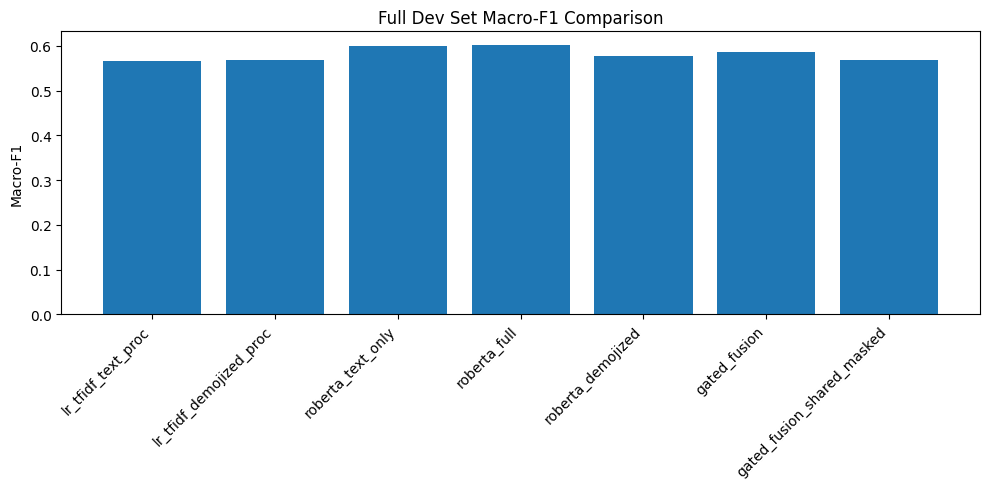

In [92]:
import json
import matplotlib.pyplot as plt
import os

runs = [
    "lr_tfidf_text_proc",
    "lr_tfidf_demojized_proc",
    "roberta_text_only",
    "roberta_full",
    "roberta_demojized",
    "gated_fusion",
    "gated_fusion_shared_masked",
]

f1_scores = []

for r in runs:
    path = f"results/{r}/metrics.json"
    if os.path.exists(path):
        with open(path) as f:
            m = json.load(f)
        f1_scores.append(m["macro_f1"])
    else:
        f1_scores.append(0)

plt.figure(figsize=(10,5))
plt.bar(runs, f1_scores)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Macro-F1")
plt.title("Full Dev Set Macro-F1 Comparison")
plt.tight_layout()
plt.show()

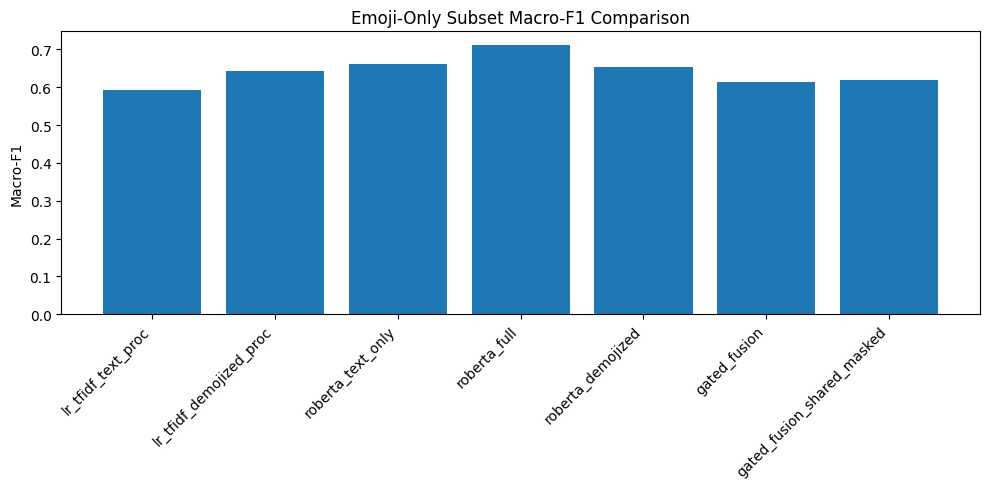

In [93]:
import pandas as pd
import emoji
from sklearn.metrics import f1_score
import json

def has_emoji(s):
    return any(ch in emoji.EMOJI_DATA for ch in str(s))

df = pd.read_csv("data/train.En.processed.csv")
with open("data/splits.json") as f:
    splits = json.load(f)

dev = df[df.index.isin(set(splits["dev_ids"]))].copy()
emoji_ids = set(dev[dev["tweet"].apply(has_emoji)].index.astype(int))

subset_f1 = []

for r in runs:
    preds = pd.read_csv(f"results/{r}/preds.csv")
    preds = preds[preds["id"].isin(emoji_ids)]
    mf1 = f1_score(preds["y_true"], preds["y_pred"], average="macro")
    subset_f1.append(mf1)

plt.figure(figsize=(10,5))
plt.bar(runs, subset_f1)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Macro-F1")
plt.title("Emoji-Only Subset Macro-F1 Comparison")
plt.tight_layout()
plt.show()

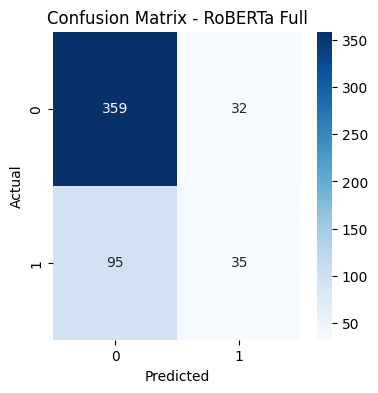

In [94]:
import seaborn as sns
import numpy as np

with open("results/roberta_full/confusion.json") as f:
    conf = json.load(f)["matrix"]

plt.figure(figsize=(4,4))
sns.heatmap(np.array(conf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - RoBERTa Full")
plt.show()

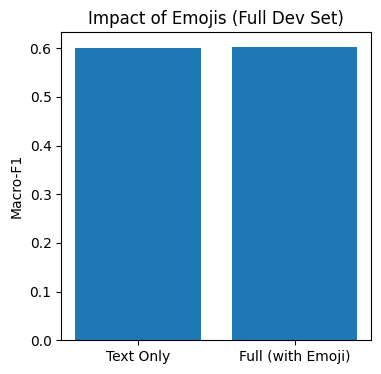

In [95]:
base = json.load(open("results/roberta_text_only/metrics.json"))["macro_f1"]
full = json.load(open("results/roberta_full/metrics.json"))["macro_f1"]

plt.figure(figsize=(4,4))
plt.bar(["Text Only", "Full (with Emoji)"], [base, full])
plt.ylabel("Macro-F1")
plt.title("Impact of Emojis (Full Dev Set)")
plt.show()